# UserBasicClassifier
Un classificador básico con la matadata del usuario

In [44]:
import pandas as pd
import numpy as np

import os
import pickle

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model  import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [45]:
users = pd.read_pickle('trainDatasets/users.pkl')

In [57]:
users.head()

,Cat,bot,screen_name,description,location,listed_count,statuses_tiempo,favs_tiempo,followers_tiempo,friends_tiempo
0,SocialSpambot1,True,True,True,False,0,80.864594,0.062251,1.369531,2.490057
1,SocialSpambot1,True,True,True,True,110,1164.354781,1020.440156,783.576770,214.717876
2,SocialSpambot1,True,True,True,True,6,1456.768757,0.887230,38.024155,47.847062
3,SocialSpambot1,True,True,True,True,2,521.653169,0.719522,26.033600,22.893869
4,SocialSpambot1,True,True,True,True,8,1344.784653,10.775305,27.470376,26.938262


In [47]:
users.applymap(type).crawled_at[0]

pandas._libs.tslibs.timestamps.Timestamp

In [48]:
# Quedarnos solo con las columnas utilizables
#users = users[['id','Cat','bot','default_profile', 'description', 'geo_enabled', 'lang', 'listed_count', 'location', 'name', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_banner_url', 'profile_image_url', 'profile_image_url_https', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'screen_name', 'url','favs_tiempo','followers_tiempo', 'statuses_tiempo','friends_tiempo']]
users = users[['Cat','bot','screen_name', 'description', 'location', 'listed_count', 'statuses_tiempo', 'favs_tiempo','followers_tiempo', 'friends_tiempo']]
# Generar ejes X de features y Normalizarlo
X = users.drop(columns=['Cat','bot'])  #[users.Cat!='SocialSpambot1']
atributos = X.columns
X = preprocessing.scale(X, axis = 0)

# Generar ejes Y de targets y encodear las etiquetas
le = preprocessing.LabelEncoder()
y =  le.fit_transform(users['bot'])  #[users.Cat!='SocialSpambot1']

# Separar entre train y test
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Generar ejes X de features y Normalizarlo
#X_escond = users.drop(columns=['Cat','bot'])[users.Cat=='SocialSpambot1']
#X_escond = preprocessing.scale(X, axis = 0)


In [55]:
X_test

array([[ 0.        ,  0.        ,  1.66446395, ..., -0.18039981,
        -0.09297402, -0.3104967 ],
       [ 0.        ,  0.        , -0.60079403, ..., -0.18039981,
        -0.11068548, -0.1863055 ],
       [ 0.        ,  0.        , -0.60079403, ...,  0.20126972,
        -0.0934476 , -0.2880616 ],
       ...,
       [ 0.        ,  0.        , -0.60079403, ..., -0.18039981,
        -0.106557  , -0.1732756 ],
       [ 0.        ,  0.        , -0.60079403, ..., -0.18039981,
        -0.10957736, -0.21081308],
       [ 0.        ,  0.        , -0.60079403, ..., -0.18039981,
        -0.10377343, -0.15288805]])

In [49]:
from catboost import CatBoostClassifier
model = CatBoostClassifier()
model.fit(X_train, y_train)

Learning rate set to 0.025637
0:	learn: 0.6267731	total: 31.9ms	remaining: 31.9s
1:	learn: 0.5674969	total: 61.8ms	remaining: 30.8s
2:	learn: 0.5124049	total: 91.7ms	remaining: 30.5s
3:	learn: 0.4710870	total: 128ms	remaining: 31.8s
4:	learn: 0.4283226	total: 163ms	remaining: 32.5s
5:	learn: 0.3875320	total: 185ms	remaining: 30.7s
6:	learn: 0.3566486	total: 222ms	remaining: 31.5s
7:	learn: 0.3254607	total: 256ms	remaining: 31.7s
8:	learn: 0.2969482	total: 288ms	remaining: 31.7s
9:	learn: 0.2708240	total: 316ms	remaining: 31.3s
10:	learn: 0.2484703	total: 348ms	remaining: 31.2s
11:	learn: 0.2287703	total: 374ms	remaining: 30.8s
12:	learn: 0.2113736	total: 400ms	remaining: 30.4s
13:	learn: 0.1960984	total: 431ms	remaining: 30.4s
14:	learn: 0.1809871	total: 465ms	remaining: 30.6s
15:	learn: 0.1686903	total: 501ms	remaining: 30.8s
16:	learn: 0.1577631	total: 536ms	remaining: 31s
17:	learn: 0.1489728	total: 572ms	remaining: 31.2s
18:	learn: 0.1406528	total: 596ms	remaining: 30.8s
19:	learn:

164:	learn: 0.0323008	total: 5.19s	remaining: 26.3s
165:	learn: 0.0322344	total: 5.22s	remaining: 26.2s
166:	learn: 0.0321845	total: 5.24s	remaining: 26.2s
167:	learn: 0.0321382	total: 5.27s	remaining: 26.1s
168:	learn: 0.0321141	total: 5.29s	remaining: 26s
169:	learn: 0.0320762	total: 5.33s	remaining: 26s
170:	learn: 0.0319061	total: 5.38s	remaining: 26.1s
171:	learn: 0.0318398	total: 5.43s	remaining: 26.2s
172:	learn: 0.0317344	total: 5.48s	remaining: 26.2s
173:	learn: 0.0316964	total: 5.51s	remaining: 26.2s
174:	learn: 0.0316882	total: 5.56s	remaining: 26.2s
175:	learn: 0.0316433	total: 5.6s	remaining: 26.2s
176:	learn: 0.0314740	total: 5.62s	remaining: 26.1s
177:	learn: 0.0314452	total: 5.65s	remaining: 26.1s
178:	learn: 0.0313880	total: 5.68s	remaining: 26.1s
179:	learn: 0.0313219	total: 5.71s	remaining: 26s
180:	learn: 0.0312724	total: 5.73s	remaining: 25.9s
181:	learn: 0.0311270	total: 5.75s	remaining: 25.9s
182:	learn: 0.0310347	total: 5.78s	remaining: 25.8s
183:	learn: 0.03100

326:	learn: 0.0241539	total: 9.73s	remaining: 20s
327:	learn: 0.0240945	total: 9.76s	remaining: 20s
328:	learn: 0.0240527	total: 9.79s	remaining: 20s
329:	learn: 0.0239698	total: 9.82s	remaining: 19.9s
330:	learn: 0.0239556	total: 9.84s	remaining: 19.9s
331:	learn: 0.0238703	total: 9.86s	remaining: 19.8s
332:	learn: 0.0238324	total: 9.89s	remaining: 19.8s
333:	learn: 0.0237352	total: 9.91s	remaining: 19.8s
334:	learn: 0.0237282	total: 9.93s	remaining: 19.7s
335:	learn: 0.0237002	total: 9.97s	remaining: 19.7s
336:	learn: 0.0236651	total: 10s	remaining: 19.7s
337:	learn: 0.0236105	total: 10s	remaining: 19.6s
338:	learn: 0.0235429	total: 10s	remaining: 19.6s
339:	learn: 0.0235244	total: 10.1s	remaining: 19.6s
340:	learn: 0.0235234	total: 10.1s	remaining: 19.5s
341:	learn: 0.0235025	total: 10.1s	remaining: 19.5s
342:	learn: 0.0234948	total: 10.1s	remaining: 19.4s
343:	learn: 0.0234656	total: 10.2s	remaining: 19.4s
344:	learn: 0.0233395	total: 10.2s	remaining: 19.3s
345:	learn: 0.0233388	to

486:	learn: 0.0192377	total: 14.2s	remaining: 15s
487:	learn: 0.0192340	total: 14.3s	remaining: 15s
488:	learn: 0.0192259	total: 14.3s	remaining: 14.9s
489:	learn: 0.0192087	total: 14.3s	remaining: 14.9s
490:	learn: 0.0192027	total: 14.3s	remaining: 14.8s
491:	learn: 0.0192008	total: 14.3s	remaining: 14.8s
492:	learn: 0.0192007	total: 14.4s	remaining: 14.8s
493:	learn: 0.0191939	total: 14.4s	remaining: 14.7s
494:	learn: 0.0191702	total: 14.4s	remaining: 14.7s
495:	learn: 0.0191675	total: 14.4s	remaining: 14.7s
496:	learn: 0.0191288	total: 14.5s	remaining: 14.6s
497:	learn: 0.0190924	total: 14.5s	remaining: 14.6s
498:	learn: 0.0190862	total: 14.5s	remaining: 14.6s
499:	learn: 0.0190321	total: 14.6s	remaining: 14.6s
500:	learn: 0.0190130	total: 14.6s	remaining: 14.5s
501:	learn: 0.0189884	total: 14.6s	remaining: 14.5s
502:	learn: 0.0189365	total: 14.6s	remaining: 14.5s
503:	learn: 0.0189286	total: 14.7s	remaining: 14.4s
504:	learn: 0.0188996	total: 14.7s	remaining: 14.4s
505:	learn: 0.01

645:	learn: 0.0162255	total: 18s	remaining: 9.88s
646:	learn: 0.0162129	total: 18.1s	remaining: 9.85s
647:	learn: 0.0161942	total: 18.1s	remaining: 9.82s
648:	learn: 0.0161770	total: 18.1s	remaining: 9.79s
649:	learn: 0.0161768	total: 18.1s	remaining: 9.76s
650:	learn: 0.0161762	total: 18.1s	remaining: 9.72s
651:	learn: 0.0161736	total: 18.2s	remaining: 9.69s
652:	learn: 0.0161654	total: 18.2s	remaining: 9.66s
653:	learn: 0.0161635	total: 18.2s	remaining: 9.63s
654:	learn: 0.0161498	total: 18.2s	remaining: 9.59s
655:	learn: 0.0161411	total: 18.2s	remaining: 9.56s
656:	learn: 0.0161238	total: 18.3s	remaining: 9.53s
657:	learn: 0.0160699	total: 18.3s	remaining: 9.5s
658:	learn: 0.0160667	total: 18.3s	remaining: 9.47s
659:	learn: 0.0160207	total: 18.3s	remaining: 9.44s
660:	learn: 0.0159880	total: 18.3s	remaining: 9.41s
661:	learn: 0.0159837	total: 18.4s	remaining: 9.38s
662:	learn: 0.0159664	total: 18.4s	remaining: 9.35s
663:	learn: 0.0159372	total: 18.4s	remaining: 9.32s
664:	learn: 0.0

809:	learn: 0.0138628	total: 22.4s	remaining: 5.26s
810:	learn: 0.0138483	total: 22.5s	remaining: 5.24s
811:	learn: 0.0138253	total: 22.5s	remaining: 5.21s
812:	learn: 0.0138241	total: 22.5s	remaining: 5.18s
813:	learn: 0.0138230	total: 22.6s	remaining: 5.15s
814:	learn: 0.0138227	total: 22.6s	remaining: 5.12s
815:	learn: 0.0138078	total: 22.6s	remaining: 5.09s
816:	learn: 0.0138076	total: 22.6s	remaining: 5.07s
817:	learn: 0.0137990	total: 22.6s	remaining: 5.04s
818:	learn: 0.0137988	total: 22.7s	remaining: 5.01s
819:	learn: 0.0137930	total: 22.7s	remaining: 4.98s
820:	learn: 0.0137859	total: 22.7s	remaining: 4.95s
821:	learn: 0.0137858	total: 22.7s	remaining: 4.92s
822:	learn: 0.0137850	total: 22.7s	remaining: 4.89s
823:	learn: 0.0137802	total: 22.8s	remaining: 4.86s
824:	learn: 0.0137723	total: 22.8s	remaining: 4.83s
825:	learn: 0.0137686	total: 22.8s	remaining: 4.81s
826:	learn: 0.0137526	total: 22.9s	remaining: 4.78s
827:	learn: 0.0137485	total: 22.9s	remaining: 4.75s
828:	learn: 

968:	learn: 0.0122651	total: 26.7s	remaining: 855ms
969:	learn: 0.0122602	total: 26.7s	remaining: 827ms
970:	learn: 0.0122594	total: 26.8s	remaining: 799ms
971:	learn: 0.0122592	total: 26.8s	remaining: 772ms
972:	learn: 0.0122446	total: 26.8s	remaining: 744ms
973:	learn: 0.0122389	total: 26.8s	remaining: 716ms
974:	learn: 0.0122384	total: 26.9s	remaining: 689ms
975:	learn: 0.0122355	total: 26.9s	remaining: 661ms
976:	learn: 0.0122347	total: 26.9s	remaining: 633ms
977:	learn: 0.0122339	total: 26.9s	remaining: 606ms
978:	learn: 0.0122222	total: 27s	remaining: 578ms
979:	learn: 0.0122098	total: 27s	remaining: 551ms
980:	learn: 0.0122081	total: 27s	remaining: 523ms
981:	learn: 0.0122068	total: 27s	remaining: 495ms
982:	learn: 0.0121923	total: 27s	remaining: 468ms
983:	learn: 0.0121829	total: 27.1s	remaining: 440ms
984:	learn: 0.0121785	total: 27.1s	remaining: 413ms
985:	learn: 0.0121779	total: 27.2s	remaining: 386ms
986:	learn: 0.0121472	total: 27.2s	remaining: 358ms
987:	learn: 0.0121455	

In [50]:
# Predict y PredictProba
y_predicted_cat = model.predict_proba(X_test)
y_pred = model.predict(X_test)

El valor del AUC es:  0.9956807385841252


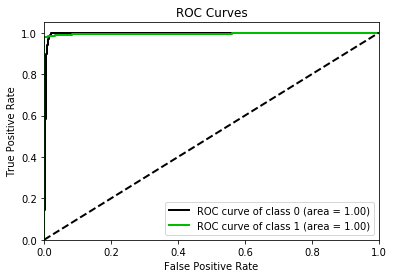

In [51]:
# AUC y Curva
from sklearn.metrics import roc_auc_score
cat_auc = roc_auc_score(y_test,y_predicted_cat[:,1])
print("El valor del AUC es: ", cat_auc)
from scikitplot.metrics import plot_roc
%matplotlib inline
plot_roc(y_test,y_predicted_cat, plot_micro = False, plot_macro= False)

In [52]:
# Matriz de Confusión
conf = confusion_matrix(y_test, y_pred)
predicted_cols = ['pred_'+str(c) for c in le.classes_]
pd.DataFrame(conf, index= ['real_Human','real_Bot'],columns = ['pred_Human','pred_Bot'])

,pred_Human,pred_Bot
real_Human,243,8
real_Bot,17,1231


In [53]:
# Scores Modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       251
           1       0.99      0.99      0.99      1248

    accuracy                           0.98      1499
   macro avg       0.96      0.98      0.97      1499
weighted avg       0.98      0.98      0.98      1499



In [58]:
# Re-Entrenar con el dataset completo
model.fit(X,y)

Learning rate set to 0.027812
0:	learn: 0.6237381	total: 22.5ms	remaining: 22.4s
1:	learn: 0.5623540	total: 48.1ms	remaining: 24s
2:	learn: 0.4973488	total: 76.6ms	remaining: 25.4s
3:	learn: 0.4482793	total: 101ms	remaining: 25.2s
4:	learn: 0.4035058	total: 139ms	remaining: 27.7s
5:	learn: 0.3676770	total: 164ms	remaining: 27.1s
6:	learn: 0.3400781	total: 192ms	remaining: 27.2s
7:	learn: 0.3050445	total: 224ms	remaining: 27.8s
8:	learn: 0.2845146	total: 253ms	remaining: 27.8s
9:	learn: 0.2565740	total: 276ms	remaining: 27.4s
10:	learn: 0.2385955	total: 303ms	remaining: 27.3s
11:	learn: 0.2188068	total: 328ms	remaining: 27s
12:	learn: 0.2044700	total: 356ms	remaining: 27s
13:	learn: 0.1886258	total: 381ms	remaining: 26.9s
14:	learn: 0.1764750	total: 406ms	remaining: 26.6s
15:	learn: 0.1656100	total: 434ms	remaining: 26.7s
16:	learn: 0.1534563	total: 467ms	remaining: 27s
17:	learn: 0.1445806	total: 498ms	remaining: 27.1s
18:	learn: 0.1354701	total: 523ms	remaining: 27s
19:	learn: 0.12733

166:	learn: 0.0336115	total: 4.94s	remaining: 24.6s
167:	learn: 0.0334687	total: 4.99s	remaining: 24.7s
168:	learn: 0.0334625	total: 5.01s	remaining: 24.6s
169:	learn: 0.0334565	total: 5.05s	remaining: 24.7s
170:	learn: 0.0334146	total: 5.08s	remaining: 24.6s
171:	learn: 0.0333479	total: 5.11s	remaining: 24.6s
172:	learn: 0.0332332	total: 5.16s	remaining: 24.7s
173:	learn: 0.0331875	total: 5.19s	remaining: 24.7s
174:	learn: 0.0331690	total: 5.22s	remaining: 24.6s
175:	learn: 0.0331425	total: 5.27s	remaining: 24.7s
176:	learn: 0.0331011	total: 5.3s	remaining: 24.6s
177:	learn: 0.0330516	total: 5.33s	remaining: 24.6s
178:	learn: 0.0330279	total: 5.36s	remaining: 24.6s
179:	learn: 0.0329982	total: 5.42s	remaining: 24.7s
180:	learn: 0.0329909	total: 5.45s	remaining: 24.7s
181:	learn: 0.0329780	total: 5.48s	remaining: 24.6s
182:	learn: 0.0329277	total: 5.51s	remaining: 24.6s
183:	learn: 0.0328344	total: 5.55s	remaining: 24.6s
184:	learn: 0.0327970	total: 5.58s	remaining: 24.6s
185:	learn: 0

331:	learn: 0.0271164	total: 9.93s	remaining: 20s
332:	learn: 0.0270674	total: 9.96s	remaining: 19.9s
333:	learn: 0.0270220	total: 9.99s	remaining: 19.9s
334:	learn: 0.0269992	total: 10s	remaining: 19.9s
335:	learn: 0.0269948	total: 10s	remaining: 19.8s
336:	learn: 0.0269626	total: 10.1s	remaining: 19.8s
337:	learn: 0.0269592	total: 10.1s	remaining: 19.8s
338:	learn: 0.0269574	total: 10.1s	remaining: 19.7s
339:	learn: 0.0269550	total: 10.1s	remaining: 19.7s
340:	learn: 0.0268633	total: 10.2s	remaining: 19.7s
341:	learn: 0.0267918	total: 10.2s	remaining: 19.7s
342:	learn: 0.0267606	total: 10.3s	remaining: 19.7s
343:	learn: 0.0267536	total: 10.3s	remaining: 19.6s
344:	learn: 0.0267408	total: 10.3s	remaining: 19.6s
345:	learn: 0.0267249	total: 10.4s	remaining: 19.6s
346:	learn: 0.0266893	total: 10.4s	remaining: 19.6s
347:	learn: 0.0266853	total: 10.4s	remaining: 19.6s
348:	learn: 0.0266386	total: 10.5s	remaining: 19.6s
349:	learn: 0.0266131	total: 10.5s	remaining: 19.5s
350:	learn: 0.0266

493:	learn: 0.0233014	total: 14.9s	remaining: 15.2s
494:	learn: 0.0232783	total: 14.9s	remaining: 15.2s
495:	learn: 0.0232712	total: 14.9s	remaining: 15.2s
496:	learn: 0.0232564	total: 15s	remaining: 15.2s
497:	learn: 0.0232516	total: 15s	remaining: 15.1s
498:	learn: 0.0232494	total: 15s	remaining: 15.1s
499:	learn: 0.0232285	total: 15.1s	remaining: 15.1s
500:	learn: 0.0232267	total: 15.1s	remaining: 15s
501:	learn: 0.0232258	total: 15.1s	remaining: 15s
502:	learn: 0.0232029	total: 15.1s	remaining: 15s
503:	learn: 0.0231889	total: 15.2s	remaining: 14.9s
504:	learn: 0.0231835	total: 15.2s	remaining: 14.9s
505:	learn: 0.0231649	total: 15.2s	remaining: 14.9s
506:	learn: 0.0231238	total: 15.3s	remaining: 14.9s
507:	learn: 0.0231236	total: 15.3s	remaining: 14.8s
508:	learn: 0.0230668	total: 15.3s	remaining: 14.8s
509:	learn: 0.0230666	total: 15.4s	remaining: 14.8s
510:	learn: 0.0230619	total: 15.4s	remaining: 14.7s
511:	learn: 0.0230416	total: 15.4s	remaining: 14.7s
512:	learn: 0.0229632	to

655:	learn: 0.0203807	total: 19.6s	remaining: 10.3s
656:	learn: 0.0203189	total: 19.6s	remaining: 10.2s
657:	learn: 0.0202950	total: 19.7s	remaining: 10.2s
658:	learn: 0.0202929	total: 19.7s	remaining: 10.2s
659:	learn: 0.0202599	total: 19.8s	remaining: 10.2s
660:	learn: 0.0202580	total: 19.8s	remaining: 10.1s
661:	learn: 0.0202552	total: 19.8s	remaining: 10.1s
662:	learn: 0.0202531	total: 19.9s	remaining: 10.1s
663:	learn: 0.0202503	total: 19.9s	remaining: 10.1s
664:	learn: 0.0202425	total: 19.9s	remaining: 10s
665:	learn: 0.0202169	total: 20s	remaining: 10s
666:	learn: 0.0201844	total: 20s	remaining: 10s
667:	learn: 0.0201823	total: 20.1s	remaining: 9.98s
668:	learn: 0.0201435	total: 20.1s	remaining: 9.95s
669:	learn: 0.0201430	total: 20.1s	remaining: 9.92s
670:	learn: 0.0201407	total: 20.2s	remaining: 9.89s
671:	learn: 0.0200837	total: 20.2s	remaining: 9.86s
672:	learn: 0.0200835	total: 20.2s	remaining: 9.83s
673:	learn: 0.0200384	total: 20.3s	remaining: 9.8s
674:	learn: 0.0200381	t

820:	learn: 0.0177679	total: 24.2s	remaining: 5.28s
821:	learn: 0.0177397	total: 24.2s	remaining: 5.25s
822:	learn: 0.0177047	total: 24.3s	remaining: 5.22s
823:	learn: 0.0176694	total: 24.3s	remaining: 5.19s
824:	learn: 0.0176527	total: 24.3s	remaining: 5.16s
825:	learn: 0.0176296	total: 24.3s	remaining: 5.13s
826:	learn: 0.0176281	total: 24.4s	remaining: 5.1s
827:	learn: 0.0175833	total: 24.4s	remaining: 5.07s
828:	learn: 0.0175794	total: 24.4s	remaining: 5.03s
829:	learn: 0.0175693	total: 24.4s	remaining: 5s
830:	learn: 0.0175577	total: 24.5s	remaining: 4.97s
831:	learn: 0.0175471	total: 24.5s	remaining: 4.94s
832:	learn: 0.0175470	total: 24.5s	remaining: 4.91s
833:	learn: 0.0175467	total: 24.5s	remaining: 4.88s
834:	learn: 0.0175183	total: 24.5s	remaining: 4.85s
835:	learn: 0.0175010	total: 24.6s	remaining: 4.82s
836:	learn: 0.0174692	total: 24.6s	remaining: 4.79s
837:	learn: 0.0174675	total: 24.6s	remaining: 4.76s
838:	learn: 0.0174663	total: 24.6s	remaining: 4.73s
839:	learn: 0.01

982:	learn: 0.0155598	total: 28.2s	remaining: 488ms
983:	learn: 0.0155468	total: 28.3s	remaining: 460ms
984:	learn: 0.0155466	total: 28.3s	remaining: 431ms
985:	learn: 0.0155226	total: 28.3s	remaining: 402ms
986:	learn: 0.0155225	total: 28.3s	remaining: 373ms
987:	learn: 0.0155223	total: 28.3s	remaining: 344ms
988:	learn: 0.0155217	total: 28.4s	remaining: 315ms
989:	learn: 0.0155215	total: 28.4s	remaining: 287ms
990:	learn: 0.0155144	total: 28.4s	remaining: 258ms
991:	learn: 0.0155137	total: 28.4s	remaining: 229ms
992:	learn: 0.0155025	total: 28.5s	remaining: 201ms
993:	learn: 0.0155024	total: 28.5s	remaining: 172ms
994:	learn: 0.0154697	total: 28.5s	remaining: 143ms
995:	learn: 0.0154650	total: 28.5s	remaining: 115ms
996:	learn: 0.0154591	total: 28.6s	remaining: 86ms
997:	learn: 0.0154212	total: 28.6s	remaining: 57.3ms
998:	learn: 0.0154181	total: 28.6s	remaining: 28.6ms
999:	learn: 0.0154036	total: 28.6s	remaining: 0us


In [59]:
# Exportar Modelo a archivo binario
model.save_model("modelo")
# Se carga luego con CatBoostClassifier().load_model("modelo")